In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = [
    ('i', 'i4'),
    ('j', 'i4'),
    ('rho', 'f4'),
    ('T', 'f4'),
    ('kap1', 'f4'),
    ('kap2', 'f4'),
]

In [3]:
from diskvert import col2python

d11, p11 = col2python('d11.dat')
d12, p12 = col2python('d12.dat')
d81, p81 = col2python('d81.dat')
d82, p82 = col2python('d82.dat')
d83, p83 = col2python('d83.dat')

def overplot_disks(ax):
    ax.plot(np.log10(d11['temp']), np.log10(d11['rho']), '-', c = '#D50D0D', label = 'Mbh = 10, R = 7')
    ax.plot(np.log10(d12['temp']), np.log10(d12['rho']), '--', c = '#D50D0D', label = 'Mbh = 10, R = 70')
    ax.plot(np.log10(d81['temp']), np.log10(d81['rho']), '-', c = '#1F90E3', label = 'Mbh = 1e8, R = 7')
    ax.plot(np.log10(d82['temp']), np.log10(d82['rho']), '--', c = '#1F90E3', label = 'Mbh = 1e8, R = 70')
    ax.plot(np.log10(d83['temp']), np.log10(d83['rho']), ':', c = '#1F90E3', label = 'Mbh = 1e8, R = 400')

In [4]:
n = 200
d = np.ndarray((n, n), dtype = dt)
d[:,:] = np.nan

for d0 in np.loadtxt('table.txt', dtype = dt):
    d[d0['i'] - 1, d0['j'] - 1] = d0

rhos = np.loadtxt('table-rho.txt')
temps = np.loadtxt('table-T.txt')

In [5]:
def civilize_plot(ax):
    ax.set_xlabel('logT')
    ax.set_ylabel('logrho')
    ax.legend(fontsize = 8)

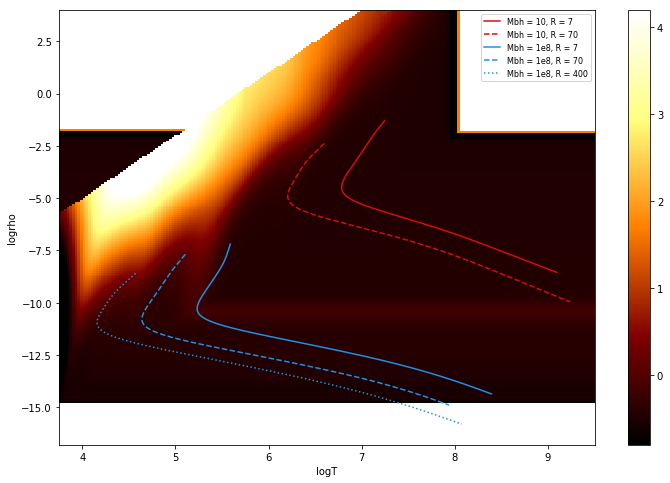

In [6]:
plt.figure(figsize = (12,8))
plt.pcolormesh(temps, rhos, d['kap1'], vmin = -0.8, vmax = 4.2, cmap = 'afmhot')
overplot_disks(plt.gca())
civilize_plot(plt.gca())
plt.colorbar()

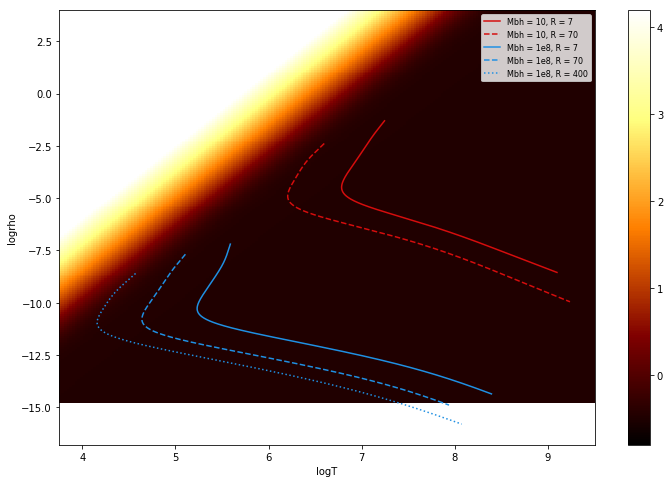

In [7]:
plt.figure(figsize = (12,8))
plt.pcolormesh(temps, rhos, d['kap2'], vmin = -0.8, vmax = 4.2, cmap = 'afmhot')
overplot_disks(plt.gca())
civilize_plot(plt.gca())
plt.colorbar()

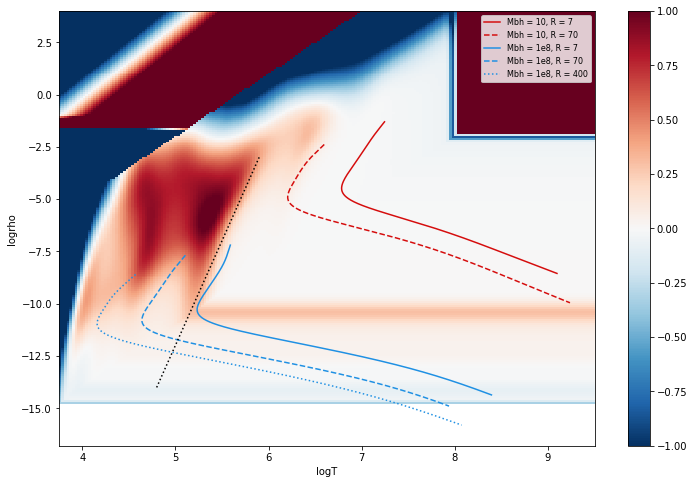

In [8]:
plt.figure(figsize = (12,8))
plt.pcolormesh(temps, rhos, d['kap1'] - d['kap2'], vmin = -1.0, vmax = 1.0, cmap = 'RdBu_r')
overplot_disks(plt.gca())
civilize_plot(plt.gca())

riri = np.logspace(-14, -3)
titi = 5e5 * (riri**2 / 1e-10)**0.05
plt.plot(np.log10(titi), np.log10(riri), 'k:')

plt.colorbar()

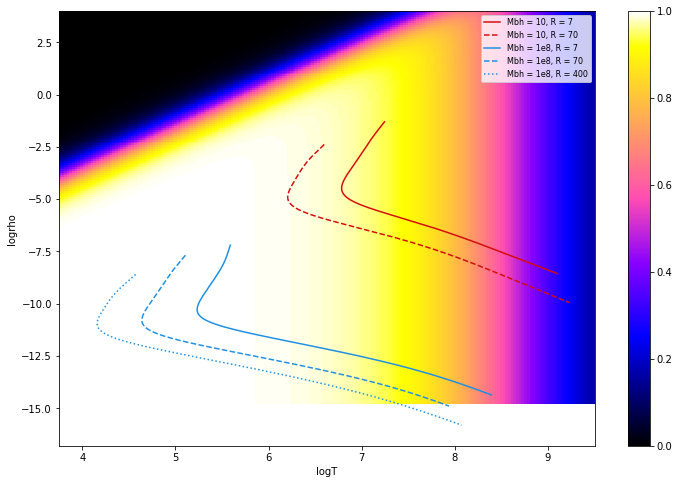

In [9]:
plt.figure(figsize = (12,8))
ti, ri = np.meshgrid(10**temps, 10**rhos)
plt.pcolormesh(temps, rhos, 1 / (1 + (ti / 4.5e8)**0.86) / (1 + 2.7e11 * ri / ti**2), vmin = 0, vmax = 1, cmap = 'gnuplot2')
#plt.colorbar()
overplot_disks(plt.gca())
civilize_plot(plt.gca())
plt.colorbar()

4.698941086052151e-06


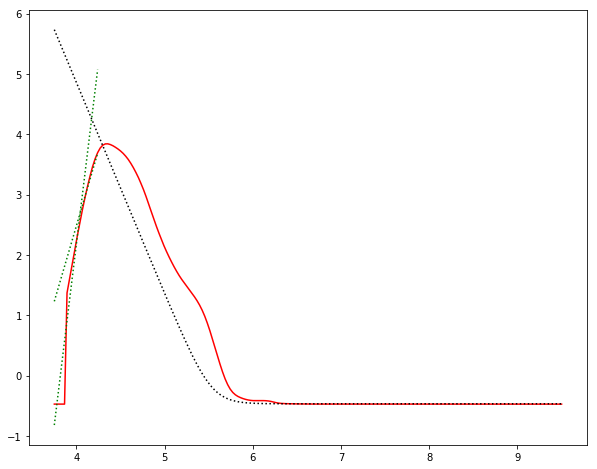

In [10]:
i1 = n // 2
plt.figure(figsize = (10,8))
plt.plot(temps, d[i1,:]['kap1'], 'r-')
plt.plot(temps, d[i1,:]['kap2'], 'k:')
T = 10**temps[:18]
print 10**rhos[i1]
plt.plot(temps[:18], np.log10(32 * (10**rhos[i1] / 2e-9)**0.2 * (T / 1e4)**12), 'g:')
plt.plot(temps[:18], np.log10(64 * (10**rhos[i1] / 2e-9)**0.2 * (T / 1e4)**5), 'g:')
# 2e-11 - 0.3
# 1e-7 - 3.0